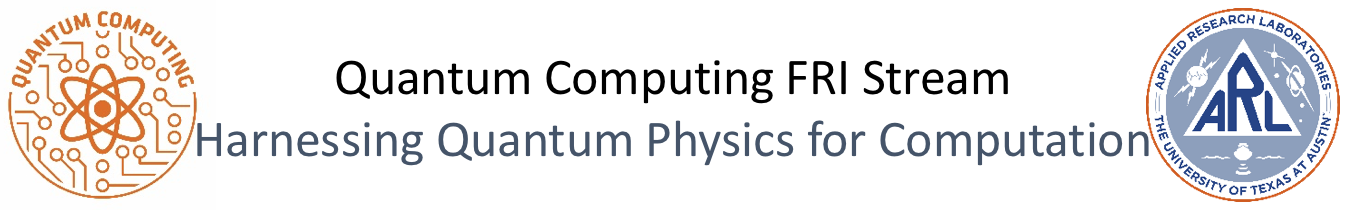

#### Most Recent Lesson: Lesson17 - Intro to Quantum Error Correction

### Installations and Imports

In [ ]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     |████████████████████████████████| 4.8 MB 7.1 MB/s 
     |████████████████████████████████| 19.2 MB 625 kB/s 
     |████████████████████████████████| 240 kB 72.9 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 106 kB 60.6 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 943 kB 60.5 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.1 MB 54.3 MB/s 
     |████████████████████████████████| 1.9 MB 65.9 MB/s 
     |████████████████████████████████| 112 kB 33.0 MB/s 
     |████████████████████████████████| 162 kB 5.9 MB/s 


In [ ]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector,plot_state_city

In [ ]:
from qiskit.circuit.library.standard_gates import U1Gate, CU1Gate

In [ ]:
def rand(a=0, b=1):
    return a + (b-a)*np.random.random()

### Syndrome Reference

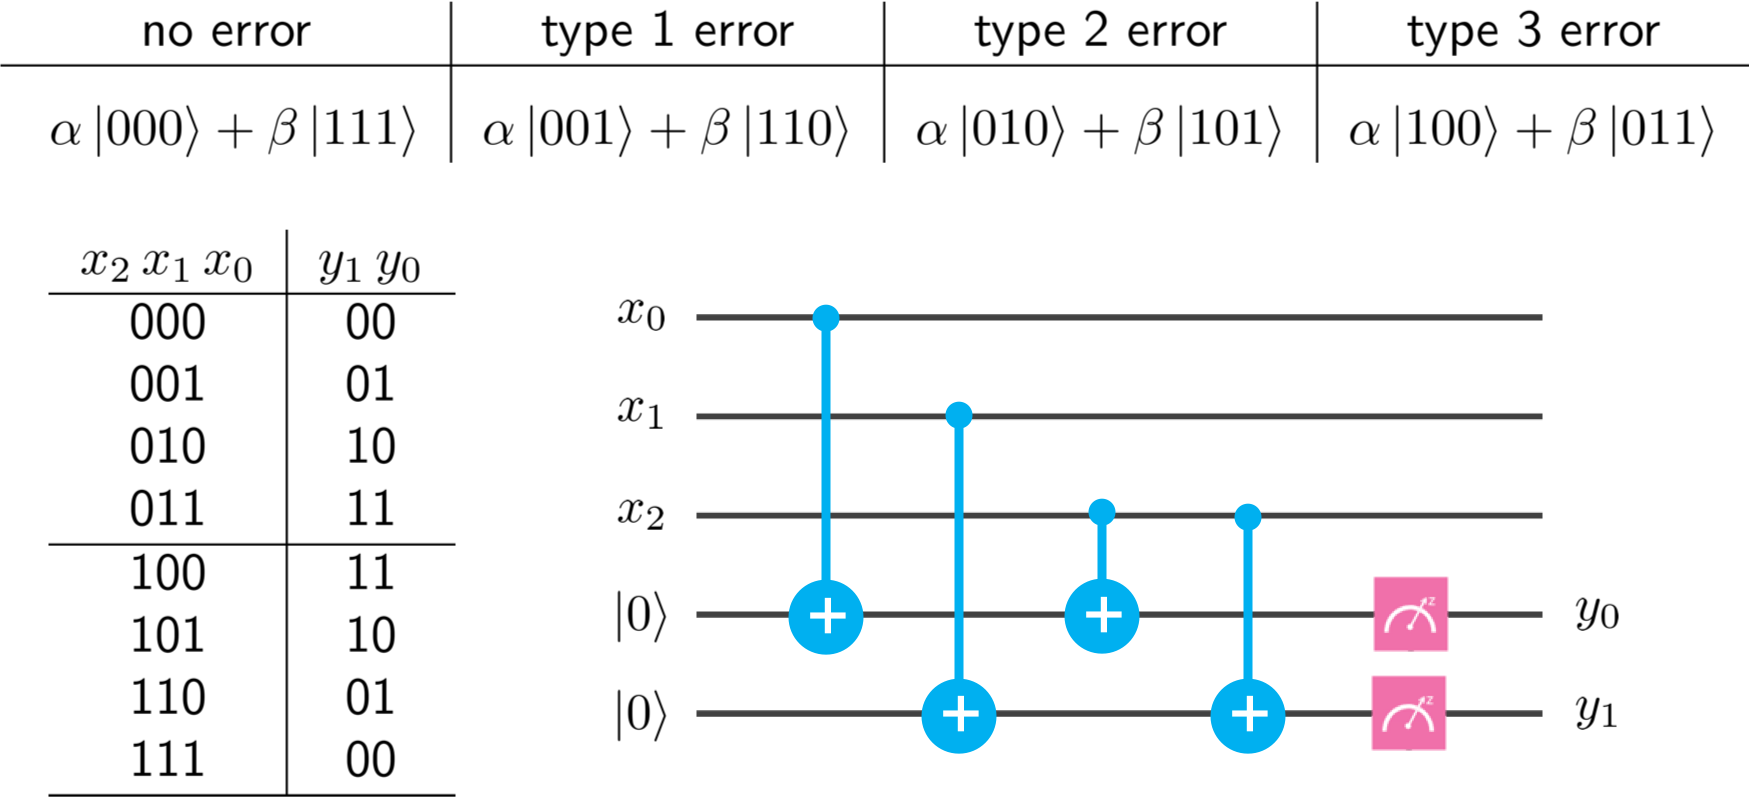

# <font color=green>Homework: Bit-Flip Quantum Error Correction</font>



Use the cells below to implement a bit-flip QEC protocol as follows:
- Prepare a random single-qubit state.
- Encode the qubit using the three-qubit repetition code.
- Add a syndrome register and apply gates to diagnose the syndrome.
- Use the syndrome measurement outcome to diagnose the error.
- Use (classical) conditional statements to correct the error.

 - (example: The command $\texttt{qc.x(qx[0]).c_if(cy,1)}$ performs an $\mathbf{X}$ on qubit $\texttt{qx[0]}$ when the classical register $\texttt{cy}$ is $1$.  
- Make an alternate version that replaces the measurements and conditionals with controlled gates. 

In [ ]:
def bitflip_syndrome(qc,qx,qy):
    qc.cx(qx[0],qy[0])
    qc.cx(qx[1],qy[1])
    qc.cx(qx[2],qy[0])
    qc.cx(qx[2],qy[1])

In [ ]:
def bitflip_qec_conditionals(qc, qx, qy, cy):
    qc.barrier()
    qc.measure(qy,cy)
    
    #Type 1 Error
    qc.x(qx[0]).c_if(cy,1)

    #Type 2 Error
    qc.x(qx[1]).c_if(cy,10)

    #Type 3
    qc.x(qx[2]).c_if(cy,11)
    qc.barrier()

In [ ]:
def bitflip_qec_controls(qc, qx, qy):
    qc.barrier()

    #Type 1 Error
    qc.x(qy[1])
    qc.ccx(qy[0],qy[1],qx[0])
    qc.x(qy[1])

    #Type 2 Error
    qc.x(qy[0])
    qc.ccx(qy[0],qy[1],qx[1])
    qc.x(qy[0])

    #Type 3 Error
    qc.ccx(qy[0],qy[1],qx[2])

In [ ]:
qx = QuantumRegister(3)
qy = QuantumRegister(2)
cx = ClassicalRegister(3)
cy = ClassicalRegister(2)
qc = QuantumCircuit(qx, qy, cx, cy)

theta = np.arccos(rand(-1,1))
phi = 2*np.pi*rand()
lamb = np.pi*rand()

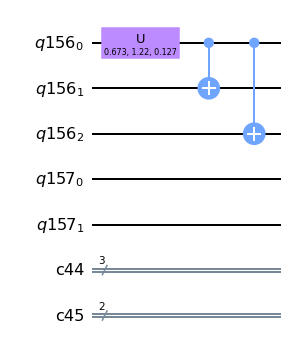

In [ ]:
#Prepare a random single-qubit state
# Put your code here.
qc.u(theta,phi,lamb,0)
#Encode the qubit using the three-qubit repetition code
# Put your code here.
qc.cx(0,1)
qc.cx(0,2)

qc.draw('mpl')

In [ ]:
# Error model
k = np.random.randint(0,4)
if k > 0:
    qc.x(qx[k-1])
print(k)


3


In [ ]:
bitflip_syndrome(qc,qx,qy)

#bitflip_qec_conditionals(qc, qx, qy, cy)
bitflip_qec_controls(qc, qx, qy)

qc.barrier()
# decode the qubit
qc.cx(qx[0], qx[2])
qc.cx(qx[0], qx[1])

# prepare it for measurement
qc.u(theta, np.pi-lamb, np.pi-phi, qx[0])

# measure qx
for i in range(len(qx)):
    qc.measure(qx[i], cx[i])
   
# measure qy
for j in range(len(qy)):
    qc.measure(qy[j], cy[j])
 
# execute the quantum circuit
backend =  Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
data = job.result().get_counts(qc)
print(data)

{'11 000': 1024}


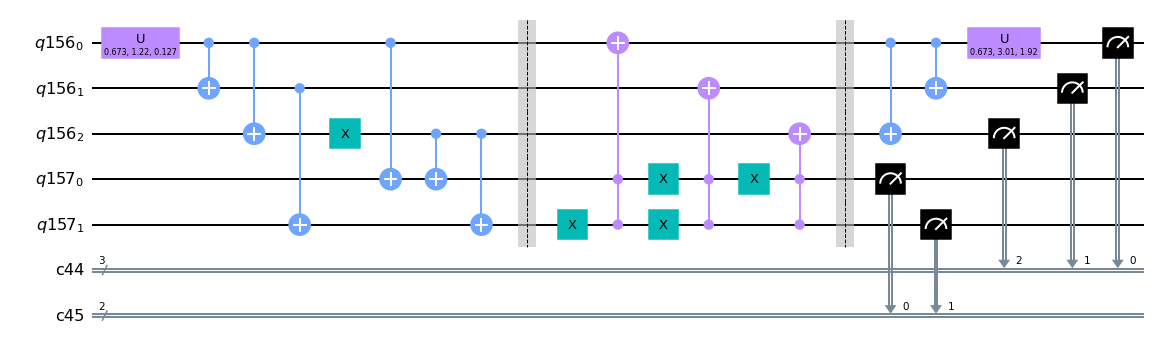

In [ ]:
qc.draw('mpl')